# TELCO_CUSTOMER_CHURN_DATASET:

# LOAD LIBRARY:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Telco_Customer_Churn_Dataset .csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
def get_unique_values(data):
    for column in data.columns:
        unique_values = data[column].unique()
        print(f"column: {column}")
        print(f"Unique Values: {unique_values}")
        print("_" * 100)

In [4]:
get_unique_values(df)
df = df.copy()

column: customerID
Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
____________________________________________________________________________________________________
column: gender
Unique Values: ['Female' 'Male']
____________________________________________________________________________________________________
column: SeniorCitizen
Unique Values: [0 1]
____________________________________________________________________________________________________
column: Partner
Unique Values: ['Yes' 'No']
____________________________________________________________________________________________________
column: Dependents
Unique Values: ['No' 'Yes']
____________________________________________________________________________________________________
column: tenure
Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6

In [6]:
df.shape

(7043, 21)

In [7]:
df.size

147903

In [8]:
df.describe(). T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
print(df.iloc[0])

customerID                7590-VHVEG
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis (EDA)
#   Missing Value Preprocessing:

<Axes: >

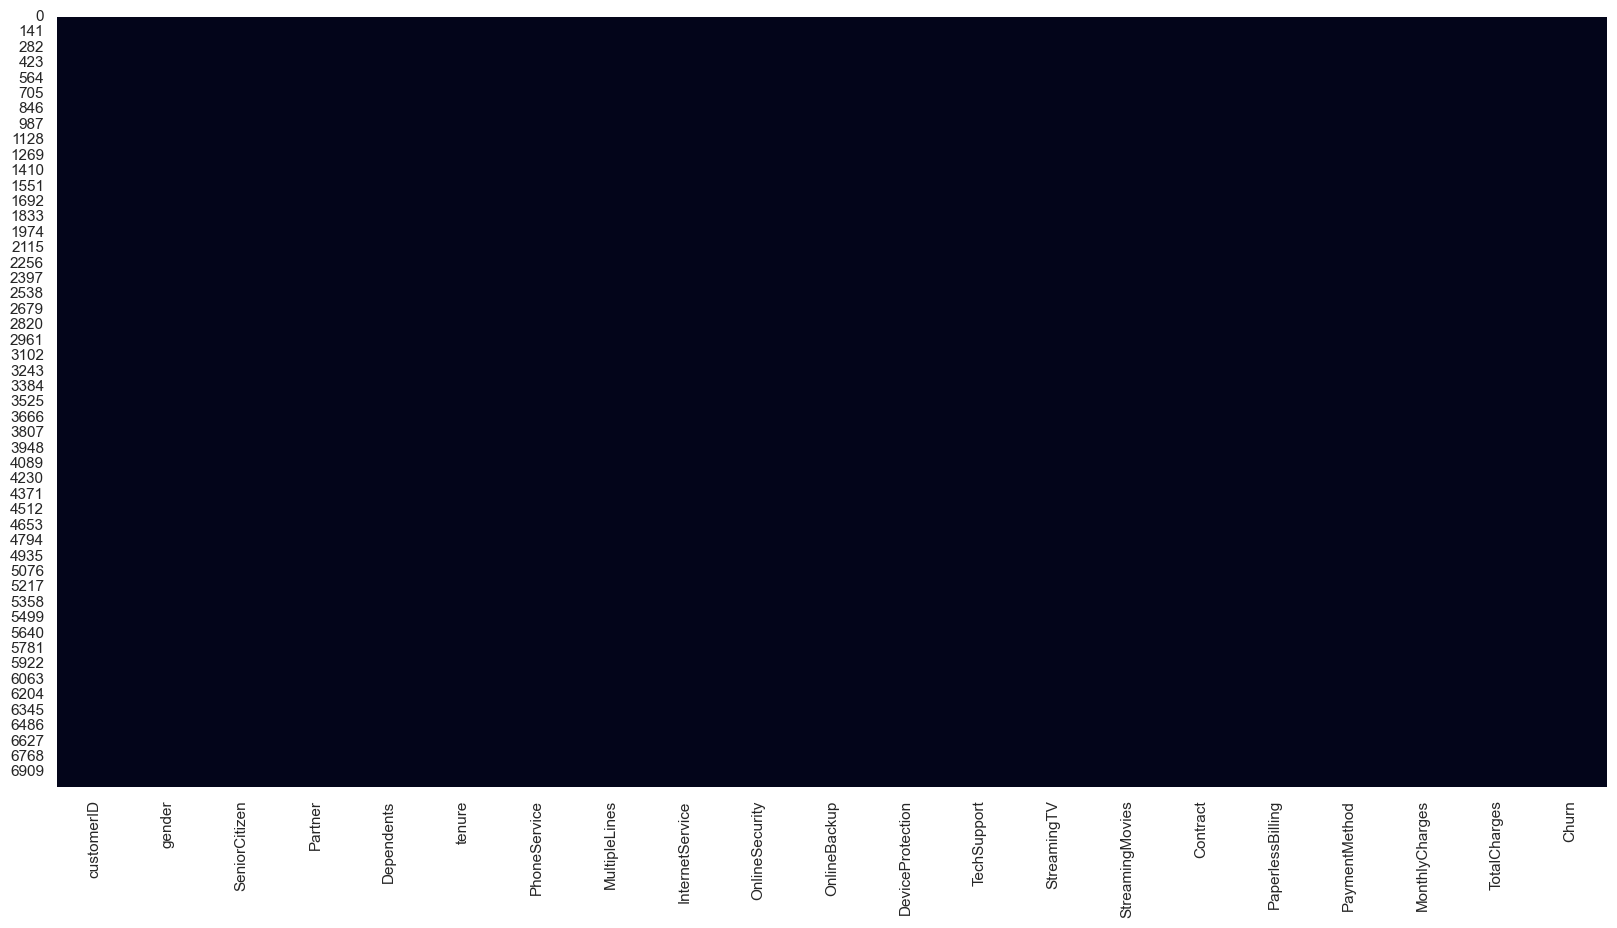

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cbar = False)

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df = df.drop(['customerID'], axis=1)

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


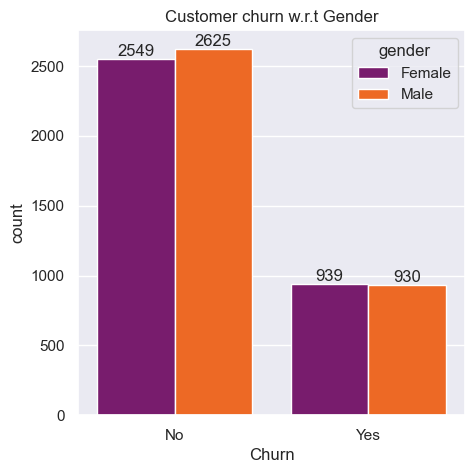

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x='Churn',data=df,hue='gender',palette='inferno',saturation=200)

for p in plt.gca().patches:  
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),ha='center',va='bottom')

plt.title('Customer churn w.r.t Gender')
plt.show()

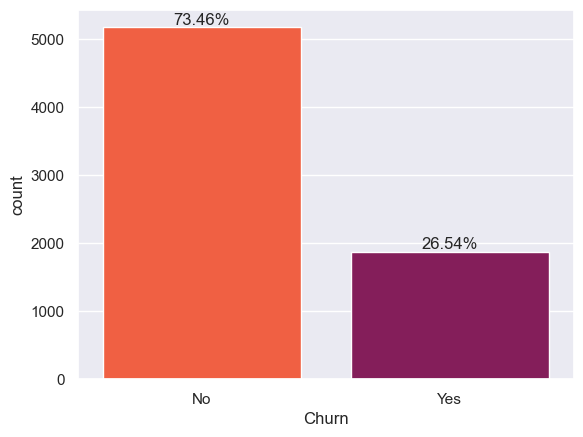

In [25]:
sns.countplot(x='Churn',data=df,palette='rocket_r',saturation=100)


for p in plt.gca().patches:
    height=p.get_height()
    total=len(df)
    percentage=(height*100)/total
    plt.text(p.get_x() + p.get_width() / 2,height,f'{percentage:.2f}%',
             ha='center',va='bottom',label=True)
   
plt.show()

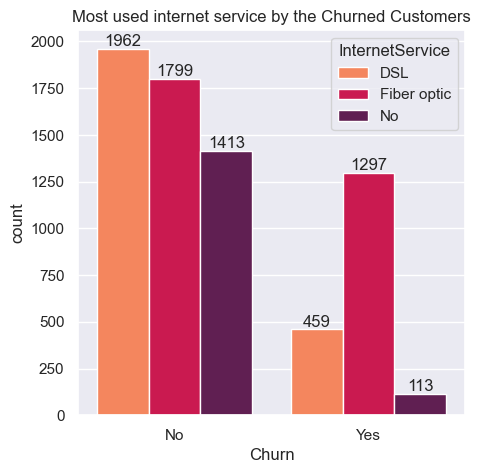

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(x='Churn',data=df,hue='InternetService',palette='rocket_r',saturation=10)

for p in plt.gca().patches:  
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),ha='center',va='bottom')

plt.title('Most used internet service by the Churned Customers')
plt.show()

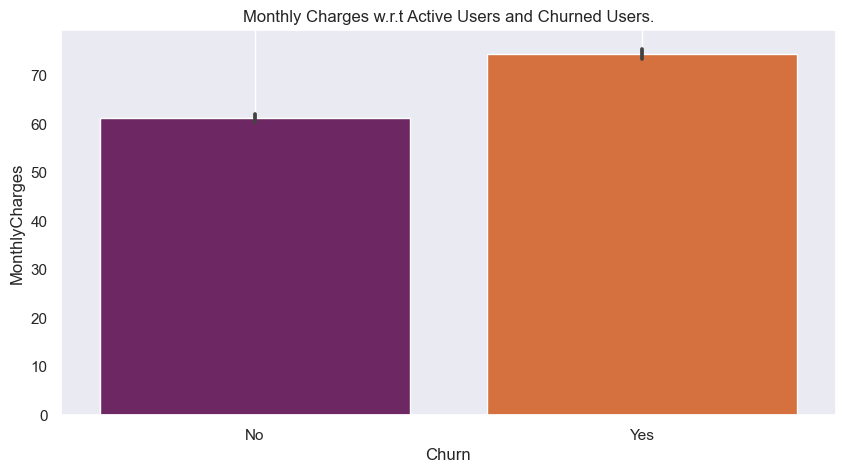

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x='Churn',y='MonthlyCharges',data=df,palette='inferno')
plt.title('Monthly Charges w.r.t Active Users and Churned Users.')

plt.grid()
plt.show()

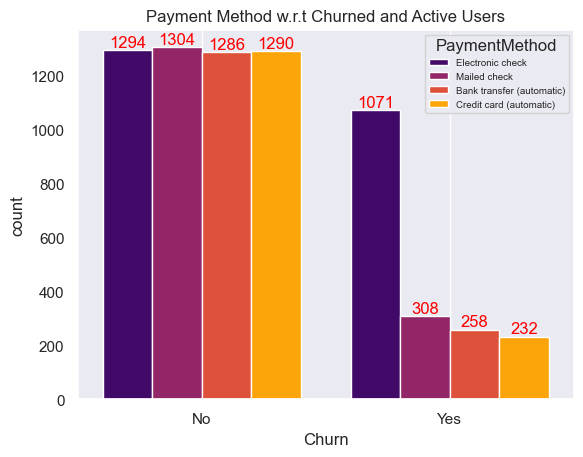

In [28]:
sns.countplot(x='Churn',hue='PaymentMethod',data=df,palette='inferno',saturation=100)

for p in plt.gca().patches:
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),
             ha='center',va='bottom',color='red')

plt.title('Payment Method w.r.t Churned and Active Users')
plt.legend(title='PaymentMethod',fontsize=7)
plt.grid()
plt.show()

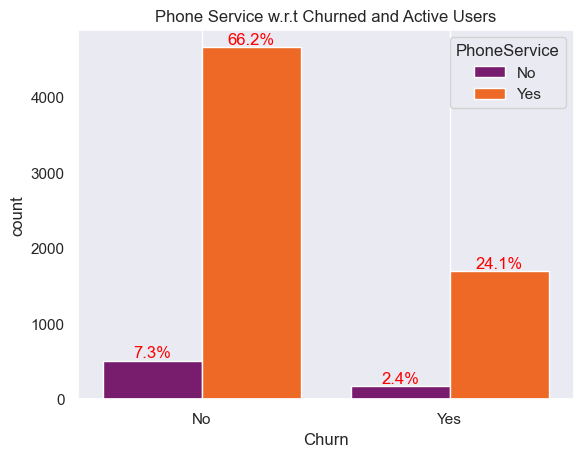

In [30]:
sns.countplot(x='Churn',hue='PhoneService',data=df,palette='inferno',saturation=100)

total=len(df)

for p in plt.gca().patches:
    height=p.get_height()
    percentage=(height*100)/total
    plt.text(p.get_x()+p.get_width()/2,height,f'{percentage:.1f}%',
             ha='center',va='bottom',color='red')

plt.gca().set(title='Phone Service w.r.t Churned and Active Users')

plt.grid()
plt.show()

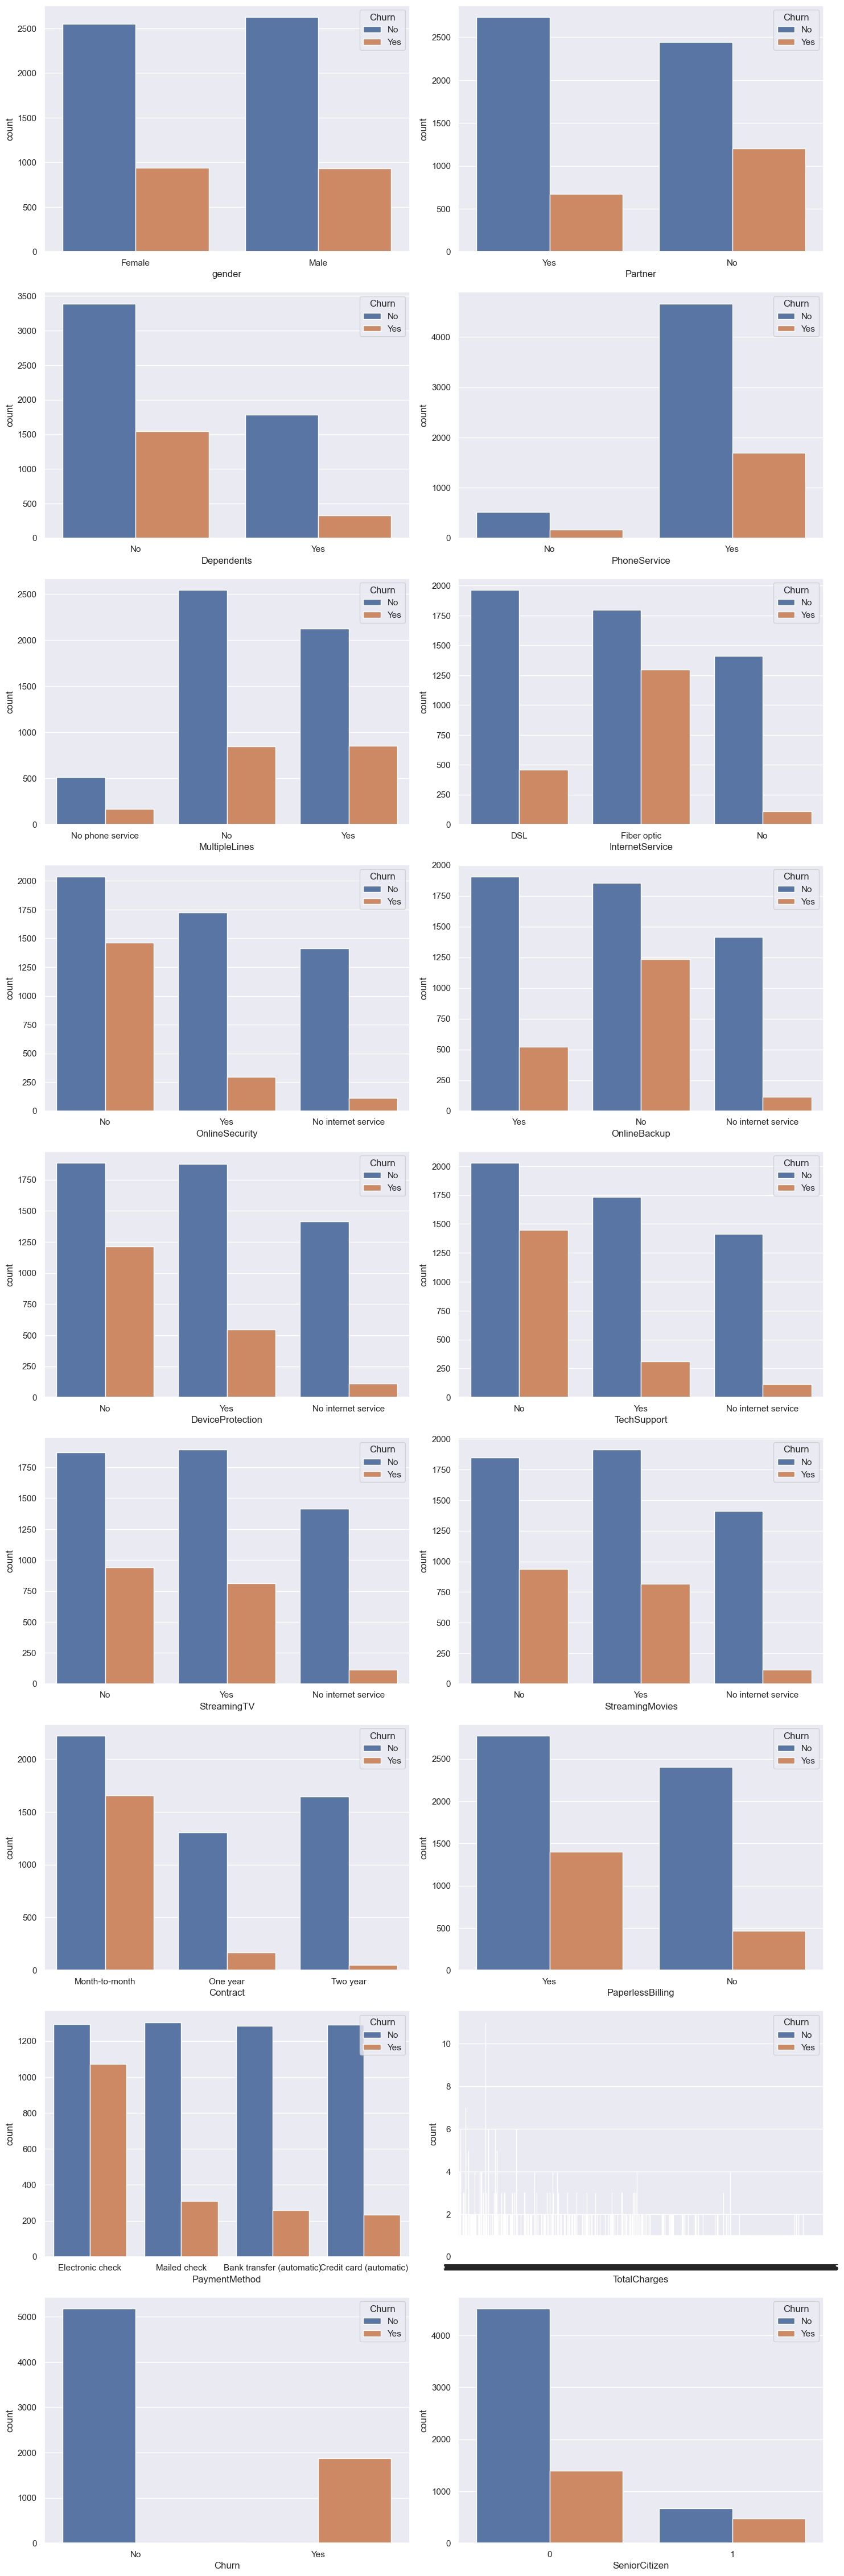

In [34]:
plt.figure(figsize=(15,50))
cat_cols = [col for col in df.columns if df[col].dtype == 'object'] + ['SeniorCitizen']
for i,col in enumerate(cat_cols):
    plt.subplot(10,2,i+1)
    sns.countplot(x=df[col],hue=df['Churn'],orient='h')
plt.tight_layout()
plt.show()

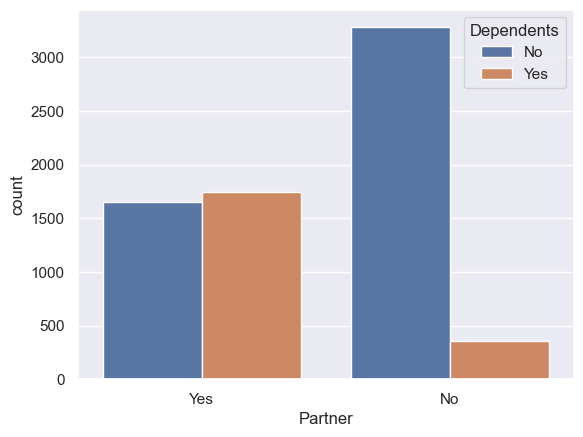

In [35]:
sns.countplot(x='Partner', hue='Dependents', data=df)
plt.show()

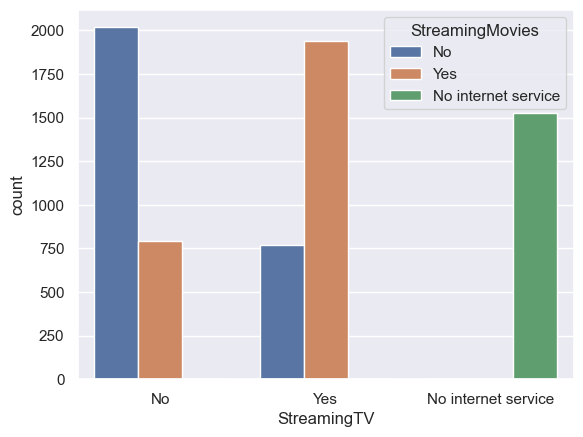

In [36]:
sns.countplot(x='StreamingTV', hue='StreamingMovies', data=df)
plt.show()

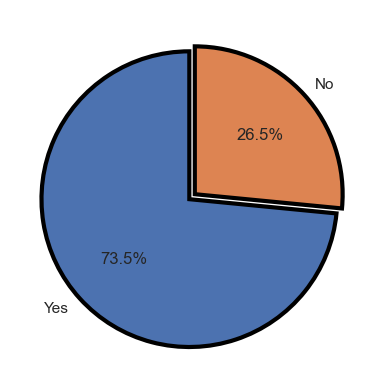

In [37]:
plt.pie(df['Churn'].value_counts(), 
        labels=['Yes', 'No'], 
        autopct='%1.1f%%', 
        startangle=90,         
        explode=(0.05, 0),
        wedgeprops={'edgecolor': 'black', 'linewidth':3}
        )

plt.show();

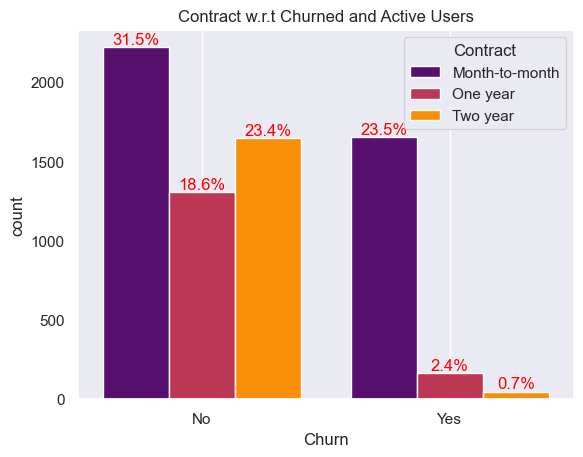

In [39]:
sns.countplot(x='Churn',hue='Contract',data=df,palette='inferno',saturation=100)

total=len(df)

for p in plt.gca().patches:
    height=p.get_height()
    percentage=(height*100)/total
    plt.text(p.get_x()+p.get_width()/2,height,f'{percentage:.1f}%',
             ha='center',va='bottom',color='red')

plt.gca().set(title='Contract w.r.t Churned and Active Users')

plt.grid()
plt.show()

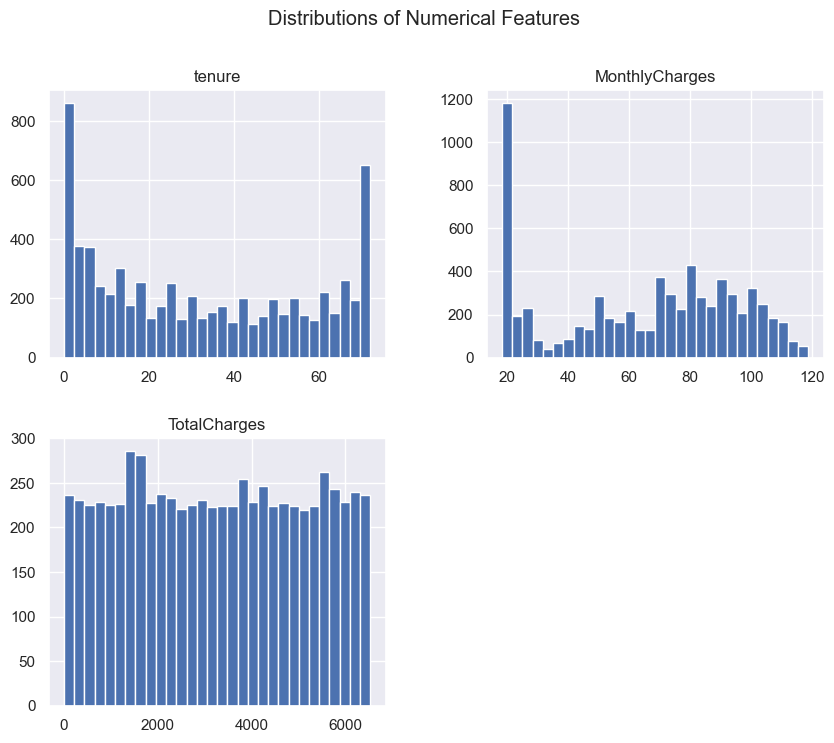

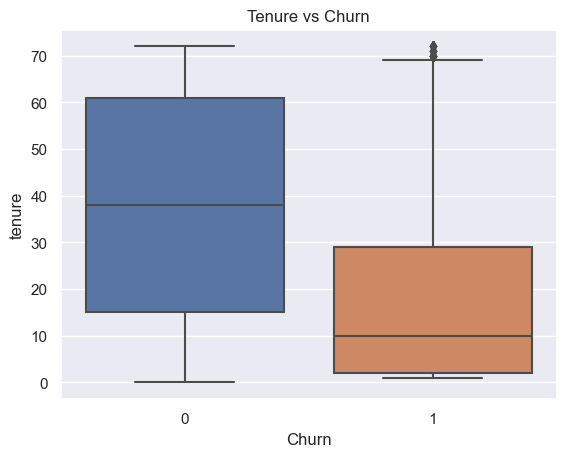

In [69]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(10, 8))
plt.suptitle('Distributions of Numerical Features')
plt.show()

# Relationship between tenure and churn
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.show()

In [41]:
# Ensure MonthlyCharges and tenure have valid values
df_cltv = df.copy()
df_cltv = df_cltv[(df_cltv['MonthlyCharges'] > 0) & (df_cltv['tenure'] > 0)]

# Calculate average active tenure for non-churned customers
average_active_tenure = df_cltv[df_cltv['Churn'] == 'No']['tenure'].mean()

# Recalculate Estimated_Lifespan
df_cltv['Estimated_Lifespan'] = df_cltv.apply(
    lambda row: row['tenure'] if row['Churn'] == 'Yes' else average_active_tenure,
    axis=1
)

# Recalculate CLTV
gross_margin = 0.6
df_cltv['CLTV'] = df_cltv['MonthlyCharges'] * df_cltv['Estimated_Lifespan'] * gross_margin

df_cltv['GrossMargin'] = df_cltv['MonthlyCharges'] * gross_margin
# Check for NaN in CLTV
print(df_cltv[df_cltv['CLTV'].isna()])

# Aggregate CLTV by Contract
contract_cltv = df_cltv.groupby('Contract')['CLTV'].mean()

# Display results
print("Sample of CLTV values:")
print(df_cltv[['Contract', 'MonthlyCharges', 'tenure', 'Estimated_Lifespan', 'CLTV']].head())

print("\nAverage CLTV by Contract Type:")
print(contract_cltv)

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, Estimated_Lifespan, CLTV, GrossMargin]
Index: []

[0 rows x 23 columns]
Sample of CLTV values:
         Contract  MonthlyCharges  tenure  Estimated_Lifespan         CLTV
0  Month-to-month           29.85       1            37.65001   674.311673
1        One year           56.95      34            37.65001  1286.500831
2  Month-to-month           53.85       2             2.00000    64.620000
3        One year           42.30      45            37.65001   955.557246
4  Month-to-month           70.70       2             2.00000    84.840000

Average CLTV by Contract Type:
Contract
Month-to-month    1093.852731
One year          1528.265639
Two year          1412.271641
Name: CLTV, dtype: float64


In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

In [44]:
encoder = LabelEncoder()
for column in cat_cols:
    df[column] = encoder.fit_transform(df[column])

In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [52]:
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['SeniorCitizen'] = LabelEncoder().fit_transform(df['SeniorCitizen'])
df['Partner'] = LabelEncoder().fit_transform(df['Partner'])
df['Dependents'] = LabelEncoder().fit_transform(df['Dependents'])
df['PhoneService'] = LabelEncoder().fit_transform(df['PhoneService'])
df['PaperlessBilling'] = LabelEncoder().fit_transform(df['PaperlessBilling'])
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# for multi-class columns
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_1,InternetService_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,0,1,0,1,0,1,0,2,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,2,0,2,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,2,2,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,1,2,0,2,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,2,0,2,...,True,False,False,False,True,False,False,False,False,True
7039,0,0,1,1,72,1,2,0,2,2,...,False,True,False,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,1,2,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,2,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [49]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [50]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [48]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train.shape

(5634, 19)

In [54]:
X_test.shape

(1409, 19)

In [55]:
scaler = StandardScaler()

In [56]:
scaler.fit(X)

StandardScaler()

In [57]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
X_train[:5]

array([[-1.00955867e+00, -4.39916493e-01, -9.66622311e-01,
         1.52902410e+00, -4.63037309e-01,  3.27438310e-01,
        -9.91588301e-01, -1.18323364e+00,  1.40732123e+00,
        -1.02991925e+00,  1.24511061e+00, -9.25262122e-01,
        -1.11349541e+00,  1.13841070e+00,  3.71271033e-01,
        -1.20511329e+00,  1.33486261e+00,  2.93498408e-03,
        -1.40201791e+00],
       [-1.00955867e+00, -4.39916493e-01, -9.66622311e-01,
        -6.54011929e-01,  8.80734693e-01,  3.27438310e-01,
         1.11703380e+00,  1.72250180e-01, -9.18837754e-01,
         1.24254983e+00, -1.02791014e+00, -9.25262122e-01,
         1.14654729e+00,  1.13841070e+00,  1.57074896e+00,
         8.29797502e-01, -1.47405205e+00,  1.07811764e+00,
         5.61912892e-01],
       [ 9.90531829e-01, -4.39916493e-01,  1.03453023e+00,
        -6.54011929e-01, -1.27744458e+00, -3.05401039e+00,
         6.27227503e-02, -1.18323364e+00, -9.18837754e-01,
        -1.02991925e+00, -1.02791014e+00, -9.25262122e-01,
    

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
parameters={'n_neighbors':[3,5,11,19],
           'weights':['uniform','distance'],
           'metric':['minikowski','manhattan']}

In [61]:
clf=GridSearchCV(KNeighborsClassifier(), parameters, cv=3, verbose=1, n_jobs=-1)

In [62]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minikowski', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [63]:
clf.best_score_

0.7807951721689741

In [64]:
clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

In [65]:
clf=KNeighborsClassifier(metric='manhattan', n_neighbors=11,weights='distance')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [66]:
confusion_matrix(y_test, y_pred)

array([[894, 142],
       [171, 202]], dtype=int64)

In [67]:
accuracy_score(y_test,y_pred)

0.7778566359119943

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.59      0.54      0.56       373

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409

